In [180]:
library(tidyverse)
library(repr)
library(tidymodels)
library(gridExtra)
options(repr.matrix.max.rows = 6)

In [94]:
# look through the dataset to see what type of variables we have
bone_data <- read_csv("data/boneMarrow.csv")
head(bone_data)
colnames(bone_data)
glimpse(bone_data)

Rows: 187 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): RecipientABO, RecipientRh, ABOmatch, CMVstatus, DonorCMV, Recipien...
dbl (25): id, Recipientgender, Stemcellsource, Donorage, Donorage35, IIIV, G...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,⋯,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,22.83014,0,1,0,1,1,1,⋯,1,7.20,1.33876,5.38,35,19,51,32,999,0
2,1,0,23.34247,0,1,0,-1,-1,1,⋯,1,4.50,11.078295,0.41,20.6,16,37,1000000,163,1
3,1,0,26.39452,0,1,0,-1,-1,1,⋯,1,7.94,19.01323,0.42,23.4,23,20,1000000,435,1
4,0,0,39.68493,1,1,0,1,2,1,⋯,?,4.25,29.481647,0.14,50,23,29,19,53,1
5,0,1,33.35890,0,0,0,1,2,0,⋯,1,51.85,3.972255,13.05,9,14,14,1000000,2043,0
6,1,0,27.39178,0,0,0,2,0,1,⋯,1,3.27,8.412758,0.39,40,16,70,1000000,2800,0


[1] "id"                   "Recipientgender"      "Stemcellsource"      
 [4] "Donorage"             "Donorage35"           "IIIV"                
 [7] "Gendermatch"          "DonorABO"             "RecipientABO"        
[10] "RecipientRh"          "ABOmatch"             "CMVstatus"           
[13] "DonorCMV"             "RecipientCMV"         "Disease"             
[16] "Riskgroup"            "Txpostrelapse"        "Diseasegroup"        
[19] "HLAmatch"             "HLAmismatch"          "Antigen"             
[22] "Alel"                 "HLAgrI"               "Recipientage"        
[25] "Recipientage10"       "Recipientageint"      "Relapse"             
[28] "aGvHDIIIIV"           "extcGvHD"             "CD34kgx10d6"         
[31] "CD3dCD34"             "CD3dkgx10d8"          "Rbodymass"           
[34] "ANCrecovery"          "PLTrecovery"          "time_to_aGvHD_III_IV"
[37] "survival_time"        "survival_status"

Rows: 187
Columns: 38
$ id                   <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…
$ Recipientgender      <dbl> 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1…
$ Stemcellsource       <dbl> 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1…
$ Donorage             <dbl> 22.83014, 23.34247, 26.39452, 39.68493, 33.35890,…
$ Donorage35           <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1…
$ IIIV                 <dbl> 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1…
$ Gendermatch          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0…
$ DonorABO             <dbl> 1, -1, -1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0,…
$ RecipientABO         <chr> "1", "-1", "-1", "2", "2", "0", "1", "1", "0", "0…
$ RecipientRh          <chr> "1", "1", "1", "1", "0", "1", "0", "1", "1", "1",…
$ ABOmatch             <chr> "0", "0", "0", "1", "1", "1", "1", "1", "1", "1",…
$ CMVstatus            <chr> "3", "0", "2", "1", "0", "?", "?", "1", "2", "2",…
$ DonorCMV        

# Part 1: Original data visualization (proposal)

In [188]:
# select only the data related to blood type and age
bone_selected <- bone_data |>
select(Donorage, ABOmatch, Recipientage, DonorABO, RecipientABO, Relapse, survival_time, survival_status)|>
mutate(survival_status = as_factor(survival_status))
bone_selected

Donorage,ABOmatch,Recipientage,DonorABO,RecipientABO,Relapse,survival_time,survival_status
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
22.83014,0,9.6,1,1,0,999,0
23.34247,0,4.0,-1,-1,1,163,1
26.39452,0,6.6,-1,-1,1,435,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
27.34794,1,10.4,1,-1,0,1895,0
27.78082,1,8.0,1,0,0,382,1
55.55342,1,9.5,1,2,0,1109,0


In [189]:
# see the summary of our database
survival_summarize <- bone_selected |>
group_by(survival_status) |>
summarize(count=n())

set.seed(1)
bone_split <- initial_split(bone_selected, prop=0.7, strata=survival_status)
bone_train <- training(bone_split)
bone_test <- testing(bone_split)
train_summarize <- bone_train |>
group_by(survival_status) |>
summarize(count=n())

survival_summarize
train_summarize

survival_status,count
<fct>,<int>
0,102
1,85


survival_status,count
<fct>,<int>
0,71
1,59


## Age analysis

In [190]:
bone_age <- bone_train |>
select(Donorage,Recipientage,Relapse,survival_time,survival_status)|>
mutate(age_diff = Donorage-Recipientage)|>
mutate(DonorAgeGroup = cut(Donorage, breaks = c(0,5,10,15,20,25,30,35,100),
              labels=c("<5","5-10","10-15","15-20","20-25","25-30","30-35","35+")))|>
mutate(RecipientAgeGroup = cut(Recipientage, breaks = c(0,5,10,15,20,25,30,35,100),
              labels=c("<5","5-10","10-15","15-20","20-25","25-30","30-35","35+")))
bone_age

Donorage,Recipientage,Relapse,survival_time,survival_status,age_diff,DonorAgeGroup,RecipientAgeGroup
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>
22.83014,9.6,0,999,0,13.23014,20-25,5-10
33.35890,1.3,0,2043,0,32.05890,30-35,<5
29.73151,1.9,0,599,0,27.83151,25-30,<5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
37.57534,12.9,1,385,1,24.67534,35+,10-15
22.89589,13.9,0,634,1,8.99589,20-25,10-15
27.78082,8.0,0,382,1,19.78082,25-30,5-10


In [191]:
Recipient_Age_summarize <- bone_age |>
group_by(RecipientAgeGroup)|>
summarize(RecipientAgeCount=n())|>
rename(age=RecipientAgeGroup)
Recipient_Age_summarize 

Donor_Age_summarize <- bone_age |>
group_by(DonorAgeGroup)|>
summarize(DonorAgeCount=n())|>
rename(age=DonorAgeGroup)
Donor_Age_summarize 

age,RecipientAgeCount
<fct>,<int>
<5,35
5-10,31
10-15,35
15-20,27
20-25,2


age,DonorAgeCount
<fct>,<int>
15-20,3
20-25,27
25-30,13
30-35,27
35+,60


In [208]:
options(tibble.print_max = 8) # to show all the rows.
age_summarize <- full_join(x=Donor_Age_summarize,y=Recipient_Age_summarize,by="age")|>
arrange(by=age)|>
rename(donor_age = DonorAgeCount,recipient_age = RecipientAgeCount)
age_summarize

age,donor_age,recipient_age
<fct>,<int>,<int>
<5,NA,35
5-10,NA,31
10-15,NA,35
15-20,3,27
20-25,27,2
25-30,13,NA
30-35,27,NA
35+,60,NA


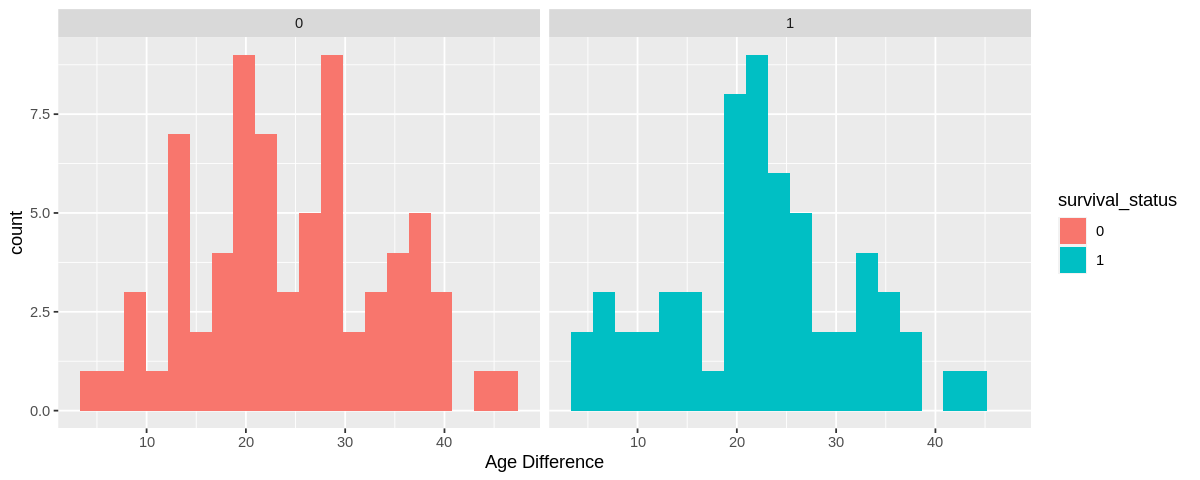

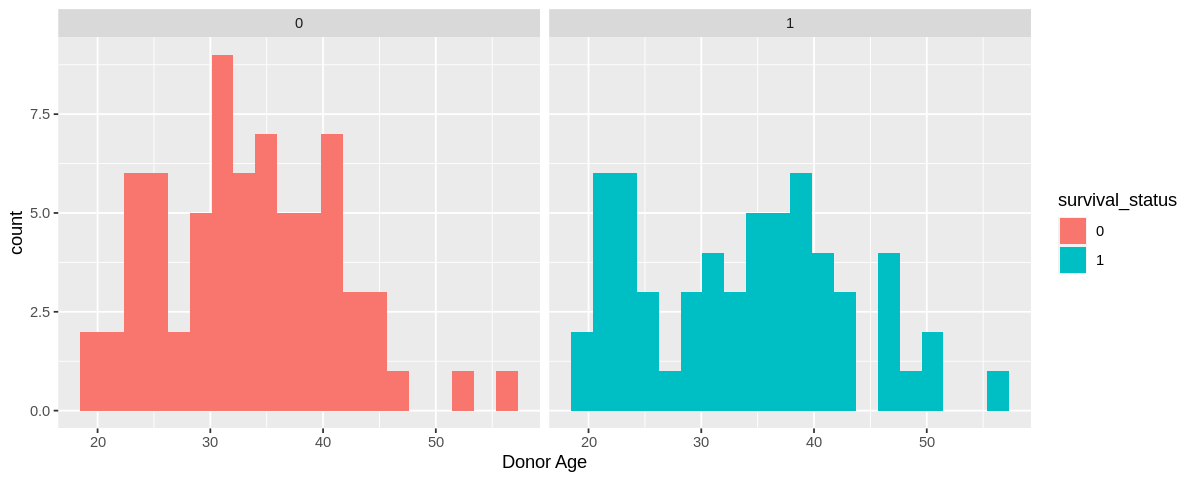

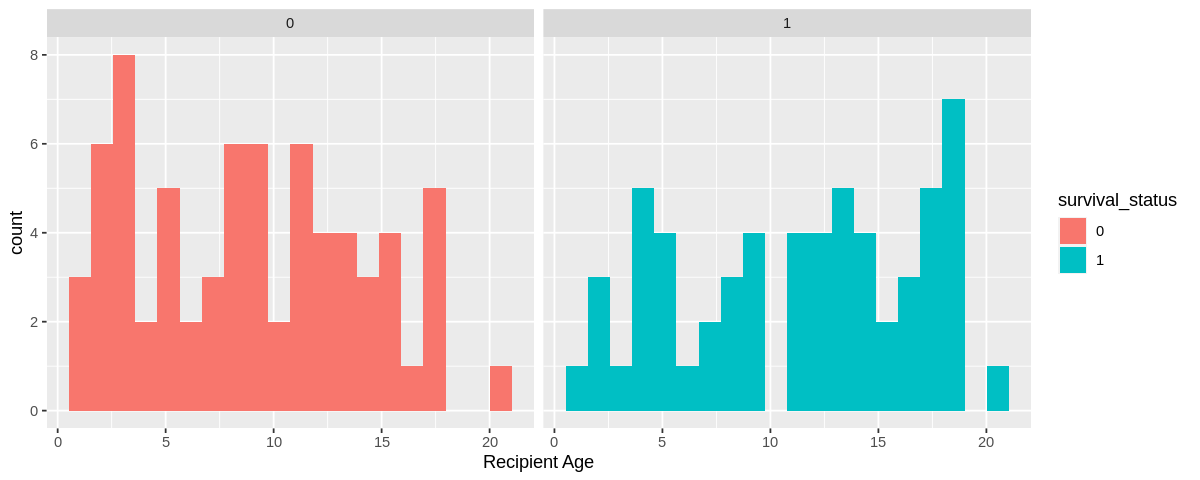

In [193]:
# visualize the distribution of donor's age, recipient's age, and the difference between donor and recipient's age
options(repr.plot.width=10,repr.plot.height=4)
age_diff_plot <- bone_age |>
ggplot(aes(x=age_diff,fill=survival_status))+
geom_histogram(bins=20)+
labs(x="Age Difference", y = "count",color= "survival status")+
facet_grid(cols=vars(survival_status))
age_diff_plot

Donor_age_plot <- bone_age |>
ggplot(aes(x=Donorage,fill=survival_status))+
geom_histogram(bins=20)+
facet_grid(cols=vars(survival_status))+
labs(x="Donor Age", y = "count",color= "survival status")
Donor_age_plot

Recipient_age_plot <- bone_age |>
ggplot(aes(x=Recipientage,fill=survival_status))+
geom_histogram(bins=20)+
facet_grid(cols=vars(survival_status))+
labs(x="Recipient Age", y = "count",color= "survival status")
Recipient_age_plot

## Blood visualization

In [194]:
# select only the variables related to the blood type
bone_blood <- bone_train |>
select(DonorABO,RecipientABO,ABOmatch,survival_time,survival_status)

# make the data tidy by filtering out missing values
bone_blood_filtered <- bone_blood |>
filter(ABOmatch != "?")

bone_blood_filtered

DonorABO,RecipientABO,ABOmatch,survival_time,survival_status
<dbl>,<chr>,<chr>,<dbl>,<fct>
1,1,0,999,0
1,2,1,2043,0
0,-1,1,599,0
⋮,⋮,⋮,⋮,⋮
1,1,0,385,1
1,0,1,634,1
1,0,1,382,1


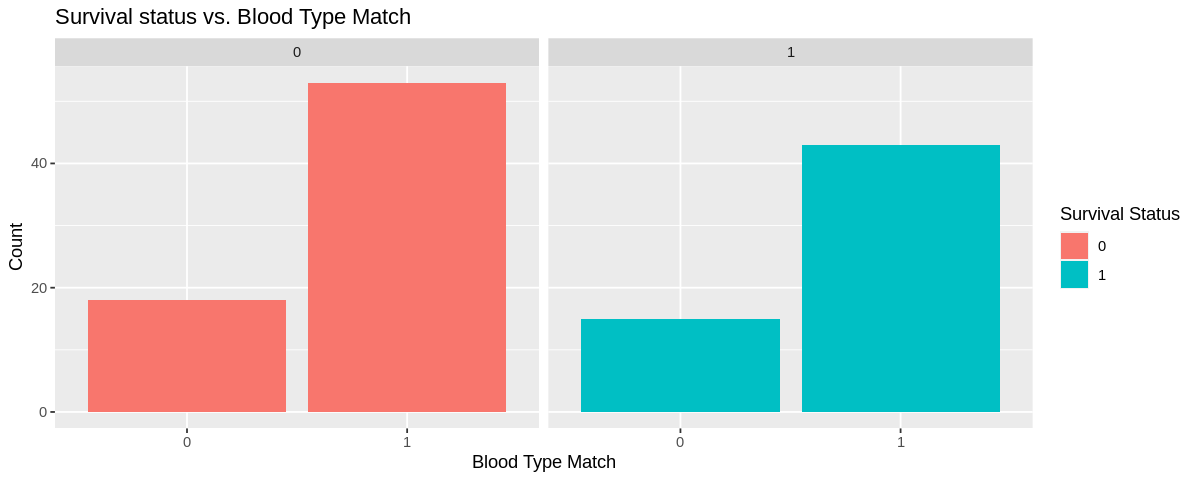

In [195]:
# Blood match visualization:
options(repr.plot.width=10,repr.plot.height=4)

blood_match_plot <- bone_blood_filtered |>
ggplot(aes(x=ABOmatch,fill=survival_status))+
geom_bar()+
facet_grid(cols=vars(survival_status)) +
ggtitle("Survival status vs. Blood Type Match") +
labs(x = "Blood Type Match", y = "Count", fill = "Survival Status") 

blood_match_plot

In [198]:
# 'DonorABO''RecipientABO'
blood_summarize <- bone_train |>
select(DonorABO, survival_status)|>
group_by(DonorABO,survival_status) |>
summarize(count=n())|>
mutate(DonorABO = case_when(
      DonorABO == -1 ~ 'B',
      DonorABO == 1 ~ 'A',
      DonorABO == 0 ~ 'O',
      DonorABO == 2 ~ 'AB'))

# transpose the dataframe to better visualize the data
t(blood_summarize)

`summarise()` has grouped output by 'DonorABO'. You can override using the
`.groups` argument.


DonorABO,B,B,O,O,A,A,AB,AB
survival_status,0,1,0,1,0,1,0,1
count,12,7,26,22,26,28,7,2


In [201]:
# see the summary of donor's blood type / Recipient's blood type and the survival rate
options(repr.plot.width=6,repr.plot.height=4)
blood_summarize2 <- bone_train |>
select(RecipientABO, DonorABO, survival_status) |>
  mutate(RecipientABO = case_when(
      RecipientABO == -1 ~ 'B',
      RecipientABO == 1 ~ 'A',
      RecipientABO == 0 ~ 'O',
      RecipientABO == 2 ~ 'AB')) |>
mutate(DonorABO = case_when(
      DonorABO == -1 ~ 'B',
      DonorABO == 1 ~ 'A',
      DonorABO == 0 ~ 'O',
      DonorABO == 2 ~ 'AB'))

#donor
Donor_summarize <- blood_summarize2 |>
group_by(DonorABO, survival_status)|>
summarize(count=n())|>
pivot_wider(names_from=survival_status,
            values_from=count) |>
rename("survive" = "1", "death" = "0")|>
mutate(survival_rate = survive/(death+survive))
Donor_summarize

#recipient
Recipient_summarize <- blood_summarize2 |>
group_by(RecipientABO, survival_status)|>
summarize(count=n())|>
pivot_wider(names_from=survival_status,
            values_from=count) |>
rename("survive" = "1", "death" = "0")|>
mutate(survival_rate = survive/(death+survive))|>
filter(RecipientABO != "NA")
Recipient_summarize

`summarise()` has grouped output by 'DonorABO'. You can override using the
`.groups` argument.


DonorABO,death,survive,survival_rate
<chr>,<int>,<int>,<dbl>
A,26,28,0.5185185
AB,7,2,0.2222222
B,12,7,0.3684211
O,26,22,0.4583333


`summarise()` has grouped output by 'RecipientABO'. You can override using the
`.groups` argument.


RecipientABO,death,survive,survival_rate
<chr>,<int>,<int>,<dbl>
A,28,26,0.4814815
AB,5,2,0.2857143
B,20,15,0.4285714
O,18,15,0.4545455


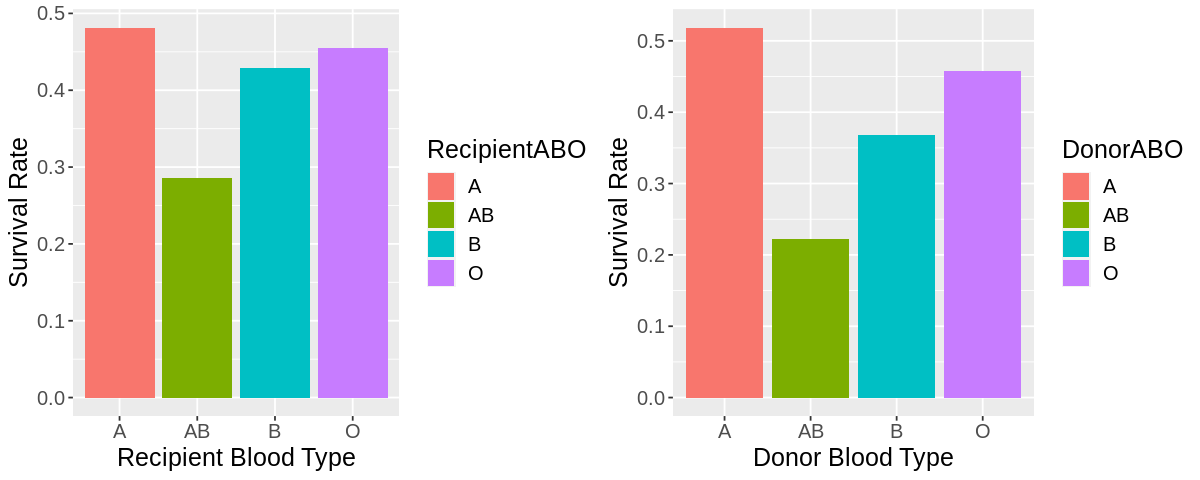

In [214]:
# visualize the summary with bar chart
Donor_plot <- Donor_summarize |>
ggplot(aes(x = as.factor(DonorABO), y = survival_rate, fill=DonorABO))+
geom_bar(stat = "identity")+
labs(x="Donor Blood Type", y = "Survival Rate")+
theme(text = element_text(size=15))

Recipient_plot <- Recipient_summarize |>
ggplot(aes(x = as.factor(RecipientABO), y = survival_rate, fill=RecipientABO))+
geom_bar(stat = "identity")+
labs(x="Recipient Blood Type", y = "Survival Rate")+
theme(text = element_text(size=15))

options(repr.plot.width=10, repr.plot.height=4)
grid.arrange(Recipient_plot, Donor_plot, ncol=2)

## All data pre-visualization summarize

## Visualization - Age
- `table` Age group count: Donor age and Recipient Age, group by margin of 5 years
- `plot` Age difference: Age difference count
- `plot` Donor Age: Donor Age count
- `plot` Recipient Age: Recipient Age count

In [209]:
options(repr.matrix.max.rows=15)
age_summarize

age,donor_age,recipient_age
<fct>,<int>,<int>
<5,NA,35
5-10,NA,31
10-15,NA,35
15-20,3,27
20-25,27,2
25-30,13,NA
30-35,27,NA
35+,60,NA


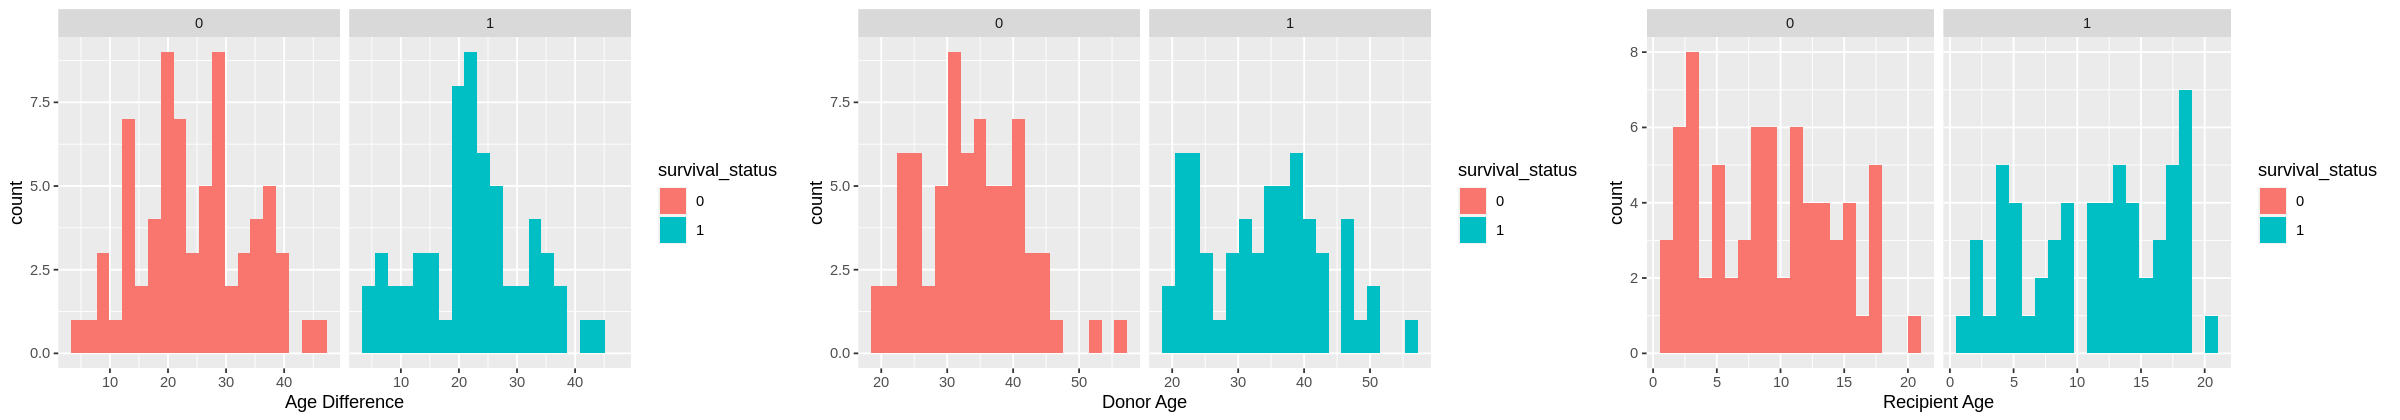

In [210]:
options(repr.plot.width=10,repr.plot.height=4)
age_diff_plot <- bone_age |>
ggplot(aes(x=age_diff,fill=survival_status))+
geom_histogram(bins=20)+
labs(x="Age Difference", y = "count",color= "survival status")+
facet_grid(cols=vars(survival_status))

Donor_age_plot <- bone_age |>
ggplot(aes(x=Donorage,fill=survival_status))+
geom_histogram(bins=20)+
facet_grid(cols=vars(survival_status))+
labs(x="Donor Age", y = "count",color= "survival status")

Recipient_age_plot <- bone_age |>
ggplot(aes(x=Recipientage,fill=survival_status))+
geom_histogram(bins=20)+
facet_grid(cols=vars(survival_status))+
labs(x="Recipient Age", y = "count",color= "survival status")

options(repr.plot.width=20, repr.plot.height=3.5)
grid.arrange(age_diff_plot, Donor_age_plot, Recipient_age_plot, ncol=3)

## Visualization - blood Type
- `table` donor blood type vs instance count
- `plot` donor blood type vs survival rates
- `table` recipient blood type vs instance count
- `plot` recipient blood type vs survival rates
- `plot` blood match vs survival count

DonorABO,death,survive,survival_rate
<chr>,<int>,<int>,<dbl>
A,26,28,0.5185185
AB,7,2,0.2222222
B,12,7,0.3684211
O,26,22,0.4583333


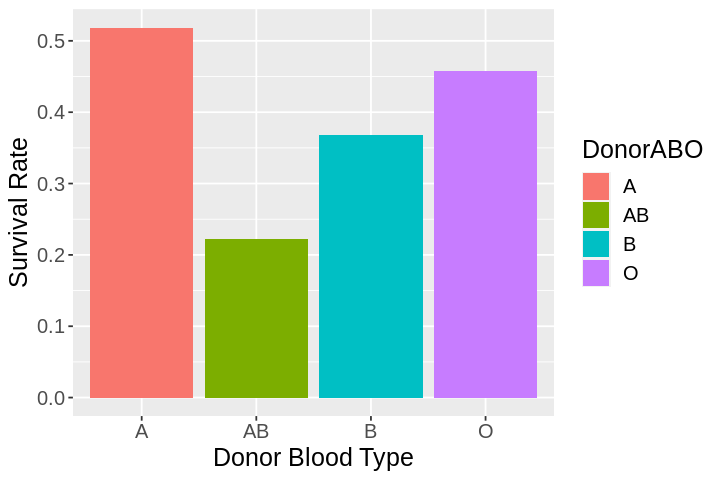

In [211]:
options(repr.plot.width=6,repr.plot.height=4)
Donor_summarize
Donor_plot

RecipientABO,death,survive,survival_rate
<chr>,<int>,<int>,<dbl>
A,28,26,0.4814815
AB,5,2,0.2857143
B,20,15,0.4285714
O,18,15,0.4545455


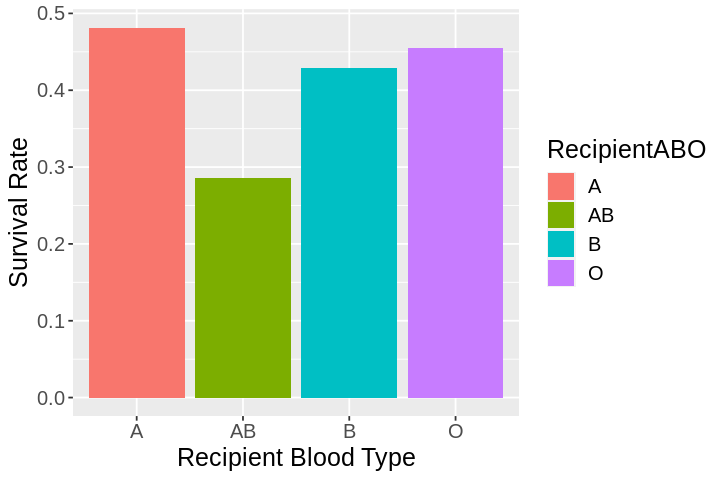

In [212]:
Recipient_summarize
Recipient_plot

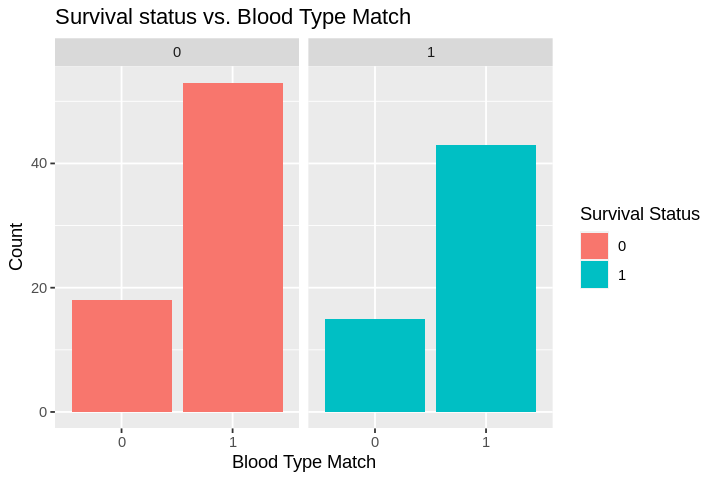

In [213]:
blood_match_plot

# Part2: New version of data preprocessing

!!! the reason why we need a new visualization

In [183]:
## tidy data
#1. discard any NA values
#2. select only the numeric values
#3. transform non numeric values into numeric values that are applicable (CD3dCD34, CD3dkgx10d8 and Rbodymass)
filtered_bone <- na.omit(bone_data)|>
select(-survival_time, -RecipientABO, -RecipientRh, -CMVstatus,-DonorCMV, -RecipientCMV, -Disease, -Antigen,-Alel,-extcGvHD)|>
mutate(survival_status = as_factor(survival_status),
        CD3dCD34 = as.numeric(CD3dCD34),
        CD3dkgx10d8 = as.numeric(CD3dkgx10d8),
        Rbodymass = as.numeric(Rbodymass),
        ABOmatch = as.numeric(ABOmatch))

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


In [147]:
# split the tidy data into training and testing dataset
set.seed(66)
bone_split <- initial_split(filtered_bone, prop = 0.75, strata = survival_status)
bone_training <- training(bone_split)
bone_testing <- testing(bone_split)

In [148]:
# use the correlation function to see which numeric varible has the closest relationship with the survival status
num_bone <- bone_training |>
mutate(survival_status = as.numeric(survival_status))
# glimpse(num_bone)
corr <- round(cor(num_bone), 1)
corr <- as.data.frame(corr)
cor2 <- corr |> 
select(survival_status)|>
arrange(desc(survival_status))
cor2 <- t(cor2)
cor2

,survival_status,PLTrecovery,Relapse,Recipientage,Recipientage10,Recipientageint,ANCrecovery,id,Donorage35,IIIV,⋯,DonorABO,HLAmismatch,Stemcellsource,ABOmatch,time_to_aGvHD_III_IV,aGvHDIIIIV,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass
survival_status,1,0.4,0.3,0.2,0.2,0.2,0.2,0.1,0.1,0.1,⋯,0,0,-0.1,-0.1,-0.1,-0.2,-0.2,NA,NA,NA


In [149]:
# choose the parameter we want from the elements that has the closest relationship with the survival_status
bone_training <- bone_training |>
select(PLTrecovery, Relapse, Recipientage, Donorage, ANCrecovery, survival_status)|>
mutate(survival_status = as.factor(survival_status))
head(bone_training)

PLTrecovery,Relapse,Recipientage,Donorage,ANCrecovery,survival_status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
51,0,9.6,22.83014,19,0
70,0,8.9,27.39178,16,0
14,0,7.9,32.64110,15,0
17,0,4.7,28.78356,16,0
13,0,1.9,29.73151,12,0
16,0,13.4,36.80000,11,0


In [150]:
# apply the forward selection to select which variables other than Recipientage should we include in our analysis
set.seed(100)
names <- colnames(bone_training |> select(-survival_status, -Recipientage))
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")
kval <- tibble(neighbors=seq(from=1, to=10,by=1))

bone_vfold <- vfold_cv(bone_training, v=5, strata = survival_status)
n_total <- length(names)
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c("Recipientage", selected, names[[j]])
        model_string <- paste("survival_status", "~", paste(preds_new, collapse="+"))
        model_string
        # create a recipe from the model string
        bone_recipe <- recipe(as.formula(model_string), data = bone_training) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(bone_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = bone_vfold, grid = kval) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}

In [151]:
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,survival_status ~ Recipientage+Relapse,0.6686371
2,survival_status ~ Recipientage+Relapse+PLTrecovery,0.7276318
3,survival_status ~ Recipientage+Relapse+PLTrecovery+ANCrecovery,0.7276318
4,survival_status ~ Recipientage+Relapse+PLTrecovery+ANCrecovery+Donorage,0.7202244


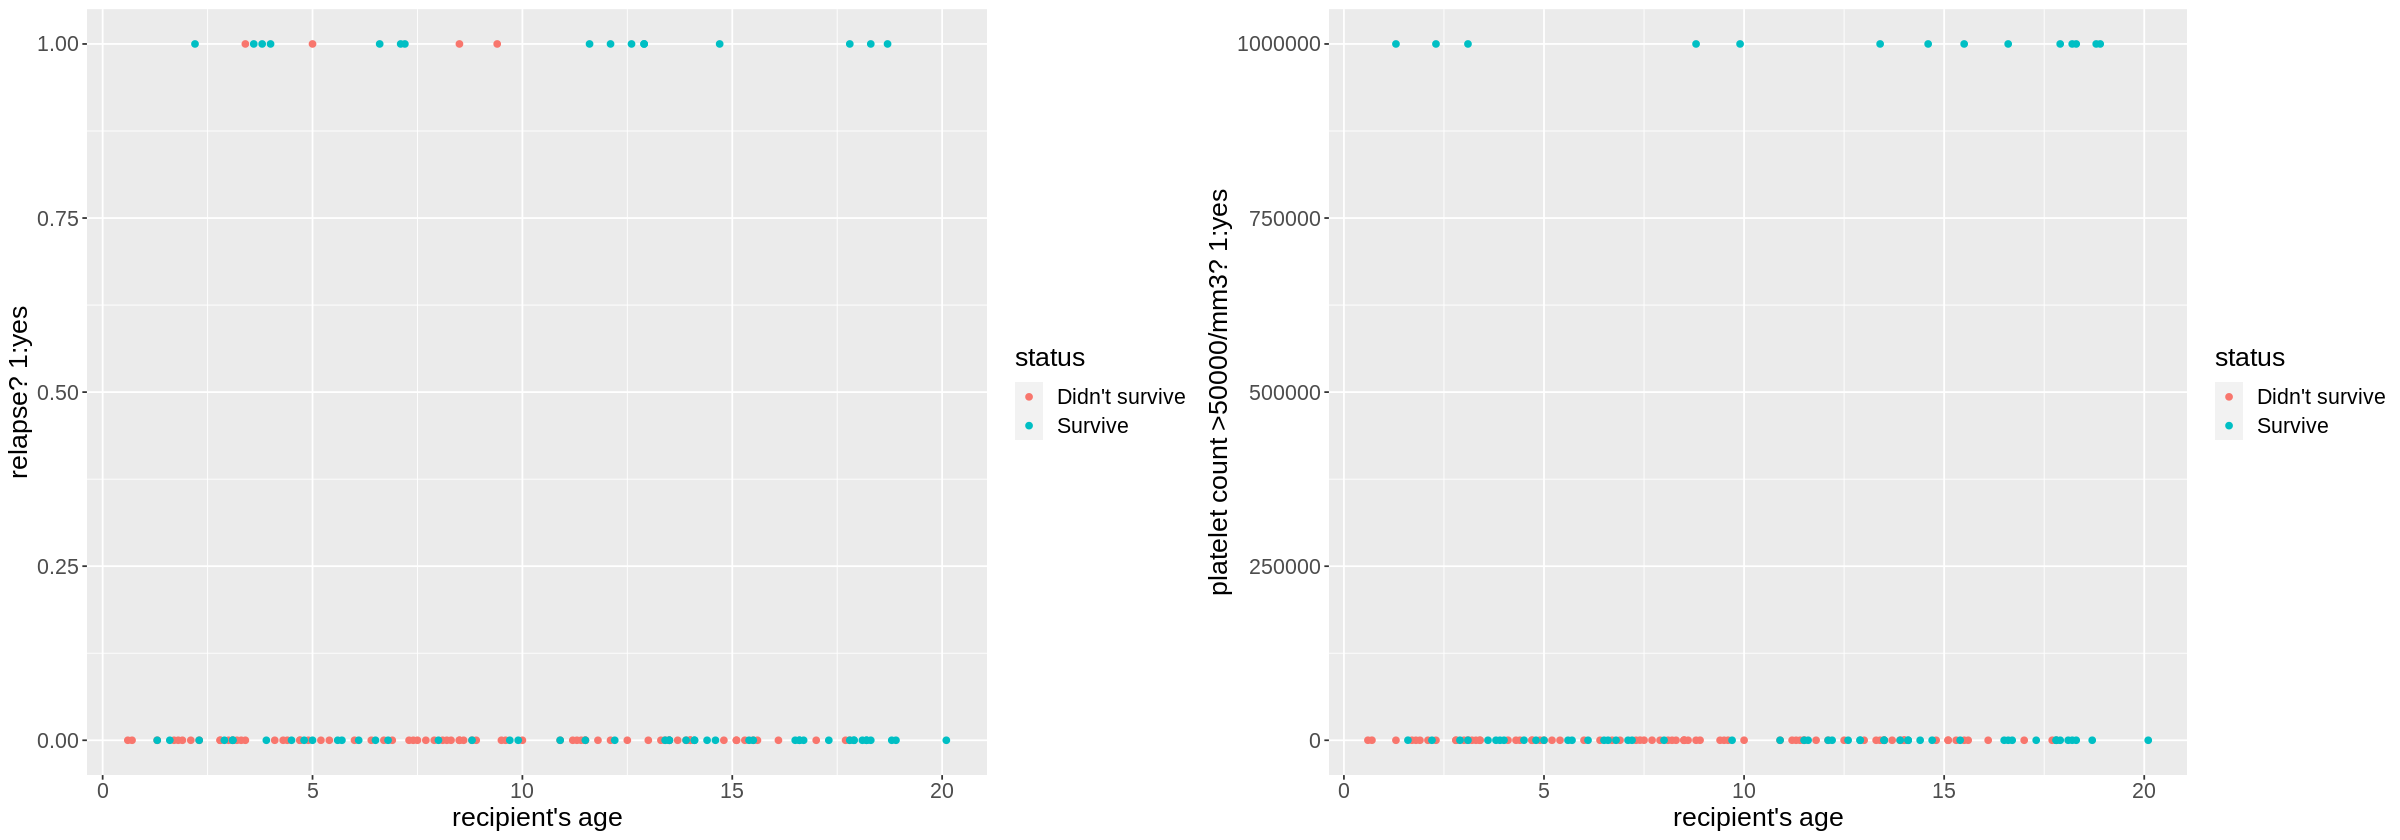

In [182]:
# visualize the relationship between survival rate and (recipientage + relapse), (recipientage + pltrecovery)

plot1 <- bone_training |>
mutate(survival_status  = case_when(
      survival_status  == 1 ~ 'Survive',
      survival_status  == 0 ~ 'Didn\'t survive'))|>
ggplot(aes(x=Recipientage, y = Relapse, color = survival_status ))+
geom_point()+
theme(text=element_text(size=16))+
labs(x="recipient's age", y = "relapse? 1:yes", color = "status")


plot2 <- bone_training |>
mutate(survival_status  = case_when(
      survival_status  == 1 ~ 'Survive',
      survival_status  == 0 ~ 'Didn\'t survive'))|>
ggplot(aes(x=Recipientage, y = PLTrecovery, color = survival_status ))+
geom_point()+
theme(text=element_text(size=16))+
labs(x="recipient's age", y = "platelet count >50000/mm3? 1:yes", color = "status")

options(repr.plot.width=20, repr.plot.height=7)
grid.arrange(plot1, plot2, ncol=2)


In [152]:
# based on the forward selection, we will choose Recipient age + Relapse + PLTrecovery as our variable.
# standardize data
bone_recipe <- recipe(survival_status ~ Recipientage+Relapse+PLTrecovery, data = bone_training) |>
  step_scale(all_predictors())|>
  step_center(all_predictors())

# build the model structure
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = tune())|>
  set_engine("kknn")|>
  set_mode("classification")

# setting the folds and ks
set.seed(234)
bone_vfold <- vfold_cv(bone_training, v = 5, strata = survival_status)
k_val <- tibble(neighbors = seq(from = 1, to = 25, by = 1))

# build the workflow for building model
knn_fit <- workflow()|>
  add_recipe(bone_recipe)|>
  add_model(knn_spec)|>
  tune_grid(resamples = bone_vfold, grid = k_val)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6045612,5,0.05883035,Preprocessor1_Model01
2,accuracy,binary,0.6045612,5,0.05883035,Preprocessor1_Model02
3,accuracy,binary,0.7043696,5,0.04227367,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
23,accuracy,binary,0.727349,5,0.01497418,Preprocessor1_Model23
24,accuracy,binary,0.727349,5,0.01497418,Preprocessor1_Model24
25,accuracy,binary,0.727349,5,0.01497418,Preprocessor1_Model25


[1] 15

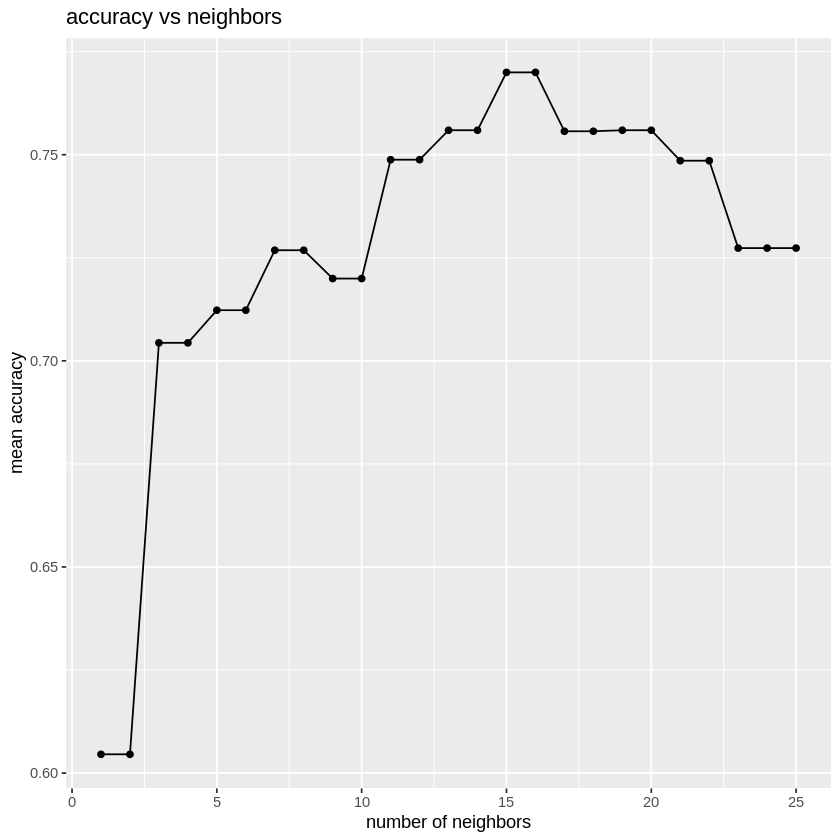

In [162]:
# visualize the result of our model
bone_metric <- knn_fit |>
collect_metrics() |>
filter(.metric == "accuracy") 
bone_metric

n_plot <- bone_metric |>
ggplot(aes(x=neighbors, y = mean))+
geom_point()+
geom_line()+
labs(x="number of neighbors", y = "mean accuracy")+
ggtitle("accuracy vs neighbors")
n_plot

nmin <- bone_metric |>
arrange(desc(mean)) |>
slice(1)|>
select(neighbors)|>
pull()
nmin

In [163]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = nmin)|>
  set_engine("kknn")|>
  set_mode("classification")

bone_vfold <- vfold_cv(bone_training, v = 5, strata = survival_status)

# build the workflow for building model
knn_fit <- workflow()|>
add_recipe(bone_recipe)|>
add_model(knn_best_spec)|>
fit(data = bone_training)

bone_pred <- predict(knn_fit, bone_testing) |>
bind_cols(bone_testing |> mutate(survival_status = as.factor(survival_status)))
bone_pred

.pred_class,id,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,ABOmatch,⋯,Relapse,aGvHDIIIIV,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_status
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,5,0,1,33.35890,0,0,0,1,1,⋯,0,1,51.85,3.972255,13.05,9.0,14,14,1e+06,0
0,13,1,1,40.86301,1,0,0,0,1,⋯,0,1,15.42,2.734654,5.64,18.1,14,37,1e+06,0
1,14,1,0,30.60274,0,1,0,0,1,⋯,1,1,3.14,3.713956,0.85,42.0,20,48,1e+06,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,176,0,1,36.69041,1,1,0,1,1,⋯,0,1,7.47,0.843967,8.85,24,15,247,1e+06,0
0,178,0,1,34.16712,0,1,0,0,1,⋯,0,1,11.45,1.671314,6.85,49,13,14,1e+06,0
0,185,0,1,27.34794,0,1,0,1,1,⋯,0,1,7.73,1.635559,4.73,33,16,16,1e+06,0


In [165]:
bone_test_metric <- bone_pred |>
  metrics(truth = survival_status, estimate = .pred_class) |>
  filter(.metric == "accuracy")
bone_test_metric


# get conf mat
bone_conf <- bone_pred |>
  conf_mat(truth = survival_status, estimate = .pred_class)
bone_conf

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7083333


          Truth
Prediction  0  1
         0 21  9
         1  5 13

# Results and Discussion

# Bibliography

In [82]:
names <- colnames(bone_training |> select(PLTrecovery, Recipientageint, Relapse, ANCrecovery, Donorage))
accuracies2 <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")
kval <- tibble(neighbors=seq(from=1, to=10,by=1))

bone_vfold <- vfold_cv(bone_training, v=5, strata = survival_status)
n_total <- length(names)
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("survival_status", "~", paste(preds_new, collapse="+"))
        model_string
        # create a recipe from the model string
        bone_recipe <- recipe(as.formula(model_string), data = bone_training) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(bone_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = bone_vfold, grid = kval) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies2 <- accuracies2 |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}

In [84]:
accuracies2 |> head()
accuracies2 |> tail()

size,model_string,accuracy
<int>,<chr>,<dbl>
1,survival_status ~ PLTrecovery,0.6691115
2,survival_status ~ PLTrecovery+Relapse,0.7258165
3,survival_status ~ PLTrecovery+Relapse+Recipientageint,0.7322022
4,survival_status ~ PLTrecovery+Relapse+Recipientageint+Donorage,0.7194308
5,survival_status ~ PLTrecovery+Relapse+Recipientageint+Donorage+ANCrecovery,0.7194308


size,model_string,accuracy
<int>,<chr>,<dbl>
1,survival_status ~ PLTrecovery,0.6691115
2,survival_status ~ PLTrecovery+Relapse,0.7258165
3,survival_status ~ PLTrecovery+Relapse+Recipientageint,0.7322022
4,survival_status ~ PLTrecovery+Relapse+Recipientageint+Donorage,0.7194308
5,survival_status ~ PLTrecovery+Relapse+Recipientageint+Donorage+ANCrecovery,0.7194308
